In [29]:
import pandas as pd
import numpy as np
import json
import os
from os.path import isfile, join, isdir
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Apresentar Resultados Novos

In [30]:
results_path = '../results/'
flist = [f for f in os.listdir(results_path) if isdir(join(results_path,f)) ]

In [31]:
result_list = []
for fname in flist:
    values = join(results_path,fname, 'values.json')
    with open(values,'r') as f:
        try:
            json_values = json.load(f)
            json_values['name'] = fname
            try:
                params = join(results_path,fname, 'params.json')
                with open(params,'r') as g:
                    json_params = json.load(g)
                    merged_dict = {**json_params, **json_values}
                    result_list.append(merged_dict)
            except:
                print(fname + ' params.json',' is with problems')
        except:
            print(fname + ' values.json',' is with problems')

miniception_D_1571670915.263857 values.json  is with problems
miniception_D_1572979899.8930633 values.json  is with problems
miniception_D_ordinal_1571740041.331543 values.json  is with problems
miniception_D_1572968116.7220452 values.json  is with problems
miniception_D_ordinal_1572873209.8428867 values.json  is with problems
miniception_D_1571739323.7566316 values.json  is with problems
miniception_D_1571671010.7799482 values.json  is with problems
miniception_D_ordinal_1571759404.6760886 values.json  is with problems
miniception_D_1572965339.363415 values.json  is with problems
miniception_D_1572979474.3422956 values.json  is with problems


In [32]:
result_list[0].keys()

dict_keys(['alpha', 'augmented', 'batch', 'beta', 'build_aug', 'checkpoint', 'config_name', 'data_folder', 'data_test_folder', 'early_stop', 'early_stop_epochs', 'height', 'label_filename', 'label_test_filename', 'learning_rate', 'mode', 'model', 'n_blocks', 'n_channels', 'n_classes', 'n_folds', 'normalize', 'num_epochs', 'rgb', 'slice', 'width', 'dev_acc_list', 'dev_dp_acc', 'dev_dp_f1', 'dev_dp_f1_weighted', 'dev_mean_acc', 'dev_mean_f1', 'dp_precision_bad', 'dp_precision_good', 'dp_precision_ugly', 'dp_recall_bad', 'dp_recall_good', 'dp_recall_ugly', 'elapsed_time', 'elapsed_time_list', 'experiment_name', 'f1_bad', 'f1_bad_list', 'f1_dp_bad', 'f1_dp_good', 'f1_dp_ugly', 'f1_good', 'f1_good_list', 'f1_list', 'f1_ugly', 'f1_ugly_list', 'f1_weighted', 'f1_weighted_list', 'filenames', 'logits', 'model_description', 'model_name', 'precision_bad', 'precision_bad_list', 'precision_good', 'precision_good_list', 'precision_ugly', 'precision_ugly_list', 'pred', 'recall_bad', 'recall_bad_list'

In [45]:
models = pd.DataFrame(result_list)
models['timestamp'] =  models['timestamp'].dropna().apply(lambda x: datetime.fromtimestamp(x))

In [96]:
from ipywidgets import interact, interact_manual

filtered_columns = ['name','config_name','f1_weighted','alpha','beta','num_epochs','augmented','aug_images',
                        'learning_rate','timestamp','elapsed_time']
evaluation_columns = ['target', 'pred','logits']
analysis_columns = ['name','f1_weighted','dev_dp_f1_weighted','f1_good','f1_dp_good','f1_bad','f1_dp_bad','f1_ugly','f1_dp_ugly',
                    'precision_good','dp_precision_good','precision_bad','dp_precision_bad','precision_ugly','dp_precision_ugly',
                     'recall_good','dp_recall_good','recall_bad','dp_recall_bad','recall_ugly','dp_recall_ugly']
    
@interact
def show_articles_more_than(model=models.sort_values(by=['model_name']).model_name.unique(),
                            alpha=widgets.SelectMultiple(
                                options=models.sort_values(by=['alpha']).alpha.unique(),
                                rows=5,
                                value=(1,),
                                description='alpha:',
                                disabled=False
                            ),
                            beta=widgets.SelectMultiple(
                                options=models.sort_values(by=['beta']).beta.unique(),
                                rows=5,
                                value=(1,),
                                description='beta:',
                                disabled=False
                            ),
                            mode=models.sort_values(by=['mode'])['mode'].unique(),
                            start_date=widgets.DatePicker(value=pd.to_datetime('2018-01-01'))
                           ):
    global model_summary
    model_summary=models.loc[models['model_name']==model].loc[models['alpha'].isin(alpha)].loc[models['beta'].isin(beta)].loc[models['mode']==mode].loc[models['timestamp']>start_date].sort_values('timestamp',ascending=False )
    return model_summary[filtered_columns]


interactive(children=(Dropdown(description='model', options=('busson_model_D', 'miniception_D', 'miniception_D…

### Confusion Matrix

In [84]:
index=39
confusion_matrix(model_summary['target'].loc[index][0],model_summary['pred'].loc[index][0])

array([[656,  17,   0],
       [ 30, 295,  24],
       [  0,   4,  19]])

### Gráfico de output Logits

In [78]:
index = 39
df = model_summary[['logits', 'target']].loc[index]
df

logits    [[[0.0018310234881937504], [0.0015169773250818...
target    [[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,...
Name: 39, dtype: object

In [71]:
logits = np.array(df.T['logits'][0])                         # Versão Velha
#logits = np.array([float(x[0]) for x in df.T['logits'][0]]) # Versão Nova
targets = np.array(df.T['target'][0])

In [72]:
results = pd.DataFrame(data={'logits': logits, 'targets': targets})

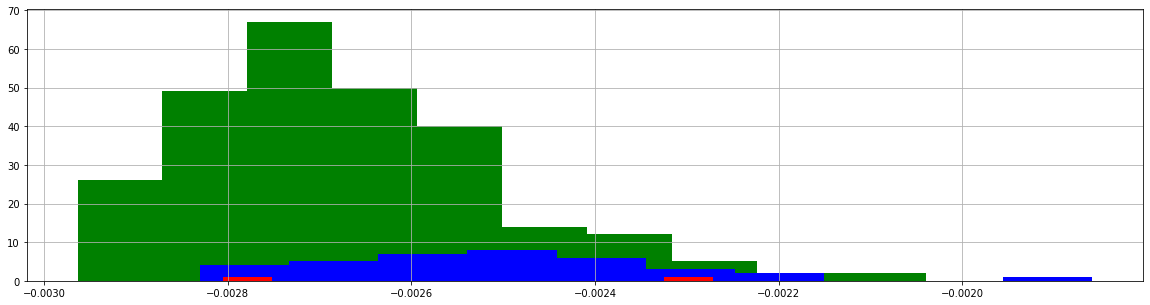

In [73]:
plt.figure(figsize=(20,5))
results[results['targets'] == 0]['logits'].hist(color='green', bins=10)
results[results['targets'] == 1]['logits'].hist(color='blue', bins=10)
results[results['targets'] == 2]['logits'].hist(color='red', bins=10)

## Excluir Arquivos do PC

In [77]:
import stat
exclude_index = [1,39]
files_to_exclude = model_summary[model_summary.index.isin(exclude_index)].name.values
for file in files_to_exclude:
    for arq in os.listdir(results_path+file):
        filename = f'{results_path}{file}/{arq}'
        os.chmod(filename, stat.S_IREAD)
        os.remove(filename)
    os.rmdir(results_path+file)

PermissionError: [Errno 1] Operation not permitted: '../results/miniception_D_1571671257.1452968/params.json'

## Gerar Variância e Indicadores

In [98]:
std = model_summary.sort_values('timestamp',ascending=False)[analysis_columns]
std*100

,name,f1_weighted,dev_dp_f1_weighted,f1_good,f1_dp_good,f1_bad,f1_dp_bad,f1_ugly,f1_dp_ugly,precision_good,...,precision_bad,dp_precision_bad,precision_ugly,dp_precision_ugly,recall_good,dp_recall_good,recall_bad,dp_recall_bad,recall_ugly,dp_recall_ugly
39,miniception_D_ordinal_1573284989.2524774minice...,93.072375,0.000000,96.541575,0.000000,88.721805,0.000000,57.575758,0.000000,95.626822,...,93.354430,0.000000,44.186047,0.000000,97.473997,0.000000,84.527221,0.000000,82.608696,0.000000
78,miniception_D_ordinal_1573282892.1751559minice...,90.895602,0.000000,94.117647,0.000000,86.567164,0.000000,62.295082,0.000000,98.222940,...,82.216495,0.000000,50.000000,0.000000,90.341753,0.000000,91.404011,0.000000,82.608696,0.000000
37,miniception_D_ordinal_1573280869.1864474minice...,89.730150,0.000000,93.928821,0.000000,83.840000,0.000000,56.250000,0.000000,88.552632,...,94.927536,0.000000,100.000000,0.000000,100.000000,0.000000,75.071633,0.000000,39.130435,0.000000
6,miniception_D_ordinal_1573278870.0097144minice...,82.890021,0.000000,90.214477,0.000000,71.252205,0.000000,45.161290,0.000000,82.173382,...,92.660550,0.000000,87.500000,0.000000,100.000000,0.000000,57.879656,0.000000,30.434783,0.000000
63,miniception_D_ordinal_1573276939.4042892minice...,86.142669,0.000000,92.117889,0.000000,77.943615,0.000000,35.714286,0.000000,85.496183,...,92.519685,0.000000,100.000000,0.000000,99.851412,0.000000,67.335244,0.000000,21.739130,0.000000
18,miniception_D_ordinal_1573275027.4901545minice...,90.329933,0.000000,94.886364,0.000000,85.975610,0.000000,23.076923,0.000000,90.884354,...,91.856678,0.000000,100.000000,0.000000,99.257058,0.000000,80.802292,0.000000,13.043478,0.000000
57,miniception_D_ordinal_1573273143.756533minicep...,88.514940,0.000000,93.070866,0.000000,82.432432,0.000000,47.500000,0.000000,98.994975,...,78.005115,0.000000,33.333333,0.000000,87.815750,0.000000,87.392550,0.000000,82.608696,0.000000
48,miniception_D_ordinal_1573271326.3651192minice...,89.017695,0.000000,94.908062,0.000000,80.471380,0.000000,46.341463,0.000000,90.553306,...,97.551020,0.000000,32.203390,0.000000,99.702823,0.000000,68.481375,0.000000,82.608696,0.000000
26,miniception_D_ordinal_1573269551.1744554minice...,87.234234,0.000000,91.041162,0.000000,84.121212,0.000000,23.076923,0.000000,99.646643,...,72.899160,0.000000,100.000000,0.000000,83.803863,0.000000,99.426934,0.000000,13.043478,0.000000
23,miniception_D_ordinal_1573267780.526811minicep...,91.237941,0.000000,95.170455,0.000000,85.576923,0.000000,62.068966,0.000000,91.156463,...,97.090909,0.000000,51.428571,0.000000,99.554235,0.000000,76.504298,0.000000,78.260870,0.000000


Formatação do Artigo

In [15]:
'''
for index, (name, line) in enumerate( model_concat[['dev_mean_f1','dev_dp_f1','f1_good','f1_good_dp',
                                                    'f1_bad','f1_bad_dp','f1_ugly','f1_ugly_dp']].round(1).iterrows() ):
    string = ''
    for i in range(len(line.values)):
        if i%2 == 0: string += ' & %s' % line.values[i]
        if i%2 == 1: string += ' $\pm$ %s' % line.values[i]
    print(string)
'''
for index, (name, line) in enumerate( model_concat[['f1_weighted','f1_good','f1_bad','f1_ugly']].round(2).iterrows() ):  
    k = [str(e) for e in line.values]
    m = ' & '.join(k)
    print(index, m)
for index, (name, line) in enumerate( model_concat[['dev_dp_f1_weighted','f1_good_dp','f1_bad_dp','f1_ugly_dp']].round(2).iterrows() ):  
    k = [str(e) for e in line.values]
    m = ' & $\pm$ '.join(k)
    print(index, m)

0 59.17 & 65.59 & 14.86 & 0.0
1 64.55 & 71.77 & 14.57 & 0.0
2 76.63 & 86.47 & 7.89 & 0.0
3 31.39 & 33.23 & 19.49 & 0.0
4 2.49 & 0.0 & 21.11 & 0.0
5 77.8 & 87.43 & 10.67 & 0.0
6 76.78 & 86.36 & 10.0 & 0.0
7 76.79 & 86.1 & 12.05 & 0.0
8 77.2 & 86.53 & 12.35 & 0.0
9 73.64 & 82.75 & 10.2 & 0.0
10 74.22 & 83.14 & 12.24 & 0.0
11 77.62 & 86.96 & 12.66 & 0.0
12 75.76 & 85.55 & 7.32 & 0.0
13 41.58 & 44.88 & 19.43 & 0.0
14 23.21 & 23.79 & 20.2 & 0.0
15 18.47 & 18.54 & 18.95 & 0.0
16 55.78 & 61.35 & 17.53 & 0.0
17 30.16 & 32.02 & 18.05 & 0.0
18 71.1 & 79.01 & 16.39 & 0.0
19 77.35 & 87.27 & 8.11 & 0.0
20 74.87 & 83.82 & 12.63 & 0.0
21 72.17 & 80.72 & 12.73 & 0.0
22 64.29 & 71.49 & 14.47 & 0.0
23 63.98 & 71.46 & 12.08 & 0.0
24 65.49 & 73.12 & 12.59 & 0.0
0 0.0 & $\pm$ nan & $\pm$ nan & $\pm$ nan
1 0.0 & $\pm$ nan & $\pm$ nan & $\pm$ nan
2 0.0 & $\pm$ nan & $\pm$ nan & $\pm$ nan
3 0.0 & $\pm$ nan & $\pm$ nan & $\pm$ nan
4 0.0 & $\pm$ nan & $\pm$ nan & $\pm$ nan
5 0.0 & $\pm$ nan & $\pm$ nan & $\pm$ 